In [1]:
# Read dataset
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
matrix = np.array(iris.data)
matrix

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
# Mean vector
mean_vector = matrix.mean(0)
mean_vector

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [3]:
# Covariance matrix
covar_matrix = np.cov(matrix.T)
covar_matrix

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [4]:
# Inverse covariance matrix
import numpy as np
inv_covar_matrix = np.linalg.inv(covar_matrix)
inv_covar_matrix

array([[ 10.31469875,  -6.71318923,  -7.31448253,   5.739951  ],
       [ -6.71318923,  11.05841725,   6.48058913,  -6.17093237],
       [ -7.31448253,   6.48058913,  10.03167858, -14.5137665 ],
       [  5.739951  ,  -6.17093237, -14.5137665 ,  27.69363502]])

In [5]:
# Substract mean to every value
Z = matrix - mean_vector
Z

array([[-7.43333333e-01,  4.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01, -5.73333333e-02, -2.35800000e+00,
        -9.99333333e-01],
       [-1.14333333e+00,  1.42666667e-01, -2.45800000e+00,
        -9.99333333e-01],
       [-1.24333333e+00,  4.26666667e-02, -2.25800000e+00,
        -9.99333333e-01],
       [-8.43333333e-01,  5.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-4.43333333e-01,  8.42666667e-01, -2.05800000e+00,
        -7.99333333e-01],
       [-1.24333333e+00,  3.42666667e-01, -2.35800000e+00,
        -8.99333333e-01],
       [-8.43333333e-01,  3.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.44333333e+00, -1.57333333e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01,  4.26666667e-02, -2.25800000e+00,
        -1.09933333e+00],
       [-4.43333333e-01,  6.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.04333333e+00,  3.42666667e-01, -2.15800000e+00,
      

In [6]:
# Z(transpose)Z
ZtZ = np.dot(Z.T, Z)
ZtZ

array([[102.16833333,  -6.32266667, 189.873     ,  76.92433333],
       [ -6.32266667,  28.30693333, -49.1188    , -18.12426667],
       [189.873     , -49.1188    , 464.3254    , 193.0458    ],
       [ 76.92433333, -18.12426667, 193.0458    ,  86.56993333]])

In [7]:
# Calculate Mahalanobis distance
def mahalanobis(x, y, cov_inv):
    delta = x-y
    return np.sqrt(np.dot(np.dot(delta.T, cov_inv), delta))

distance_to_mean = np.zeros((matrix.shape[0]))
for i in range(matrix.shape[0]):
    distance_to_mean[i] = mahalanobis(matrix[i], mean_vector, inv_covar_matrix)
distance_to_mean

array([1.46098184, 1.68793326, 1.44268453, 1.56600818, 1.5691254 ,
       1.9706389 , 1.69177662, 1.35399421, 1.83958504, 1.54117419,
       1.81193457, 1.66577235, 1.61656968, 1.89827088, 2.95592936,
       3.11653492, 2.40012243, 1.52361066, 2.12124726, 1.85441792,
       1.6235785 , 1.71150506, 1.90089753, 1.49571825, 2.30268555,
       1.56374879, 1.32884485, 1.48228899, 1.58201492, 1.56984012,
       1.40888742, 2.1426941 , 2.89107962, 2.68725026, 1.40785934,
       1.84859489, 2.31024186, 1.85777689, 1.77622614, 1.37572514,
       1.59640261, 3.37994509, 1.8205685 , 1.92576882, 2.11755898,
       1.72587955, 2.10554214, 1.53604391, 1.73427131, 1.38872752,
       2.11017323, 0.79208563, 1.73741994, 1.90066511, 1.42844636,
       1.82197306, 1.12975399, 2.0758927 , 1.65609717, 1.77947266,
       2.77187536, 0.65750865, 2.74980042, 1.24430181, 1.01845706,
       1.66930017, 1.86367153, 1.82454916, 2.71889277, 1.47775729,
       1.80596327, 1.16623755, 1.54548679, 2.12304751, 1.26866

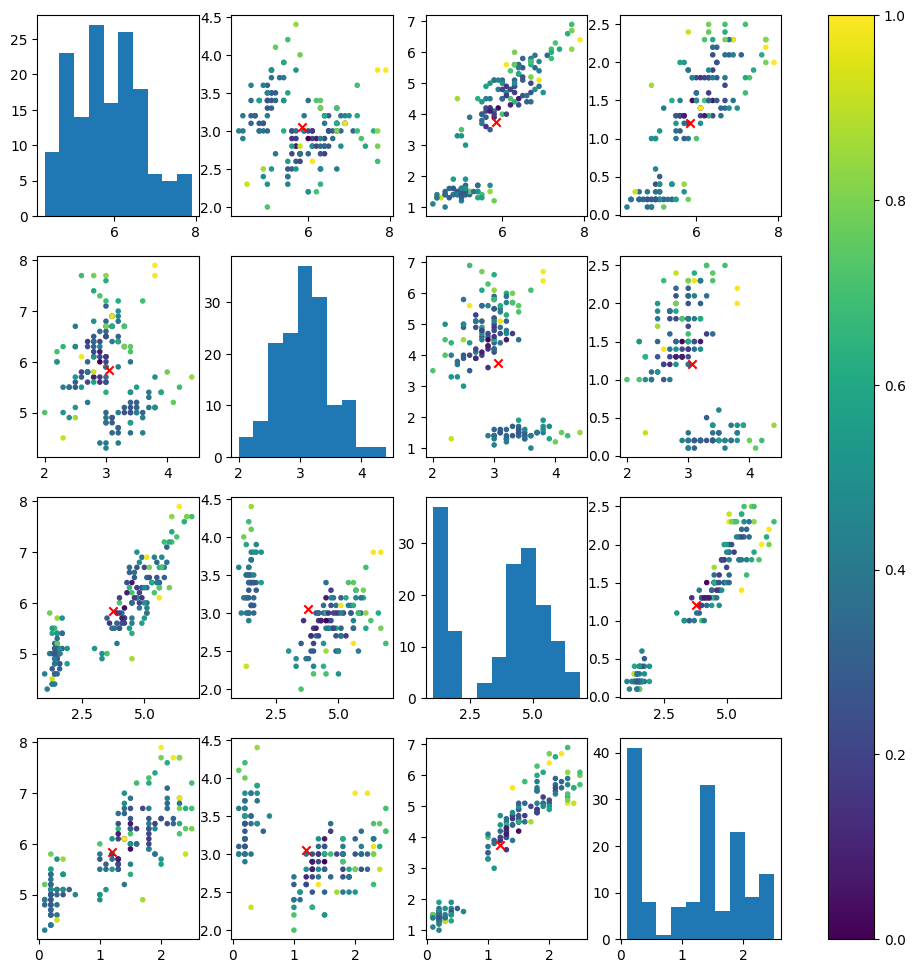

In [8]:
import matplotlib.pyplot as plt

color = np.round((distance_to_mean - min(distance_to_mean))/(max(distance_to_mean) - min(distance_to_mean))*100).astype(int)
means = np.mean(matrix, axis=0)
dimensions = len(matrix[0])

fig, ax = plt.subplots(dimensions,dimensions)
fig.set_figheight(12)
fig.set_figwidth(12)
for i in range(dimensions):
    for j in range(dimensions):
        if i==j:
            ax[i,j].hist(matrix[:,i])
        else:
            ax[i,j].scatter(matrix[:,i], matrix[:,j], c=color, cmap="viridis", marker= ".")
            ax[i,j].scatter(means[i], means[j], c="red", marker="x")

fig.colorbar(plt.cm.ScalarMappable(cmap="viridis"), ax=ax)

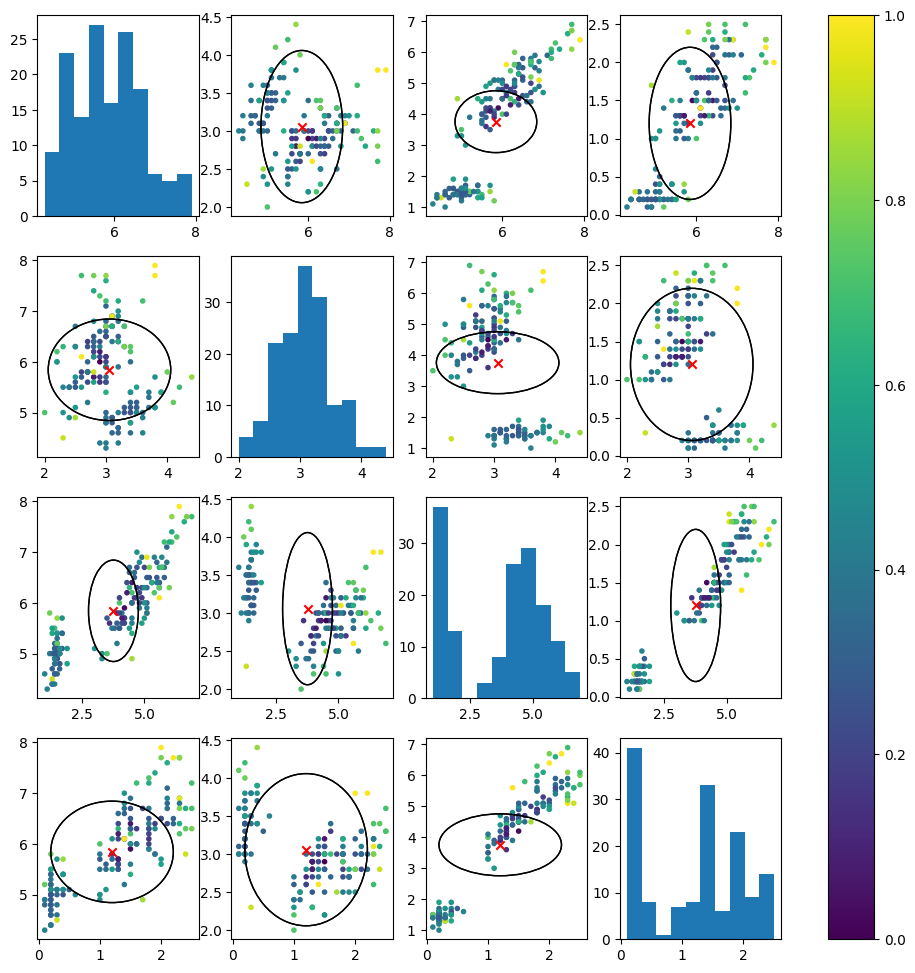

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

color = np.round((distance_to_mean - min(distance_to_mean))/(max(distance_to_mean) - min(distance_to_mean))*100).astype(int)
means = np.mean(matrix, axis=0)
dimensions = len(matrix[0])

mean = np.mean(distance_to_mean)

fig, ax = plt.subplots(dimensions,dimensions)
fig.set_figheight(12)
fig.set_figwidth(12)
for i in range(dimensions):
    for j in range(dimensions):
        if i==j:
            ax[i,j].hist(matrix[:,i])
        else:
            ax[i,j].scatter(matrix[:,i], matrix[:,j], c=color, cmap="viridis", marker= ".")
            circle = Circle((mean_vector[i], mean_vector[j]), 1, fill=False)
            ax[i,j].add_patch(circle)
            ax[i,j].scatter(means[i], means[j], c="red", marker="x")
            circle = Circle((mean_vector[i], mean_vector[j]), 1, fill=False)
            ax[i,j].add_patch(circle)

fig.colorbar(plt.cm.ScalarMappable(cmap="viridis"), ax=ax)